In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autotime
import mne
import numpy as np
from BrainPulse import (dataset,
                        vector_space,
                        distance_matrix,
                        recurrence_quantification_analysis,
                        features_space,
                        plot)

time: 4.72 s (started: 2022-07-09 18:44:13 +02:00)


In [2]:
epochs, raw = dataset.eegMCI_data(stim_type='AV', subject=6, run_type='test.dat_2', path_to_data_folder='auditory_visual_audiovisual')

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
['Cz', 'CPz', 'POz', 'Pz', 'P1', 'P2', 'C3', 'C4', 'O1', 'O2', 'T7', 'T8', 'P3', 'P4', 'F3', 'F4']
Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
time: 79.1 ms (started: 2022-07-09 18:44:20 +02:00)


/Users/luki/DataspellProjects/BrainPulse_Project/BrainPulse/dataset.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return EpochsArray(epochs,info,tmin=-0.2), np.array(raw)


In [57]:
epochs.get_data().shape

(2, 16, 614)

time: 1.33 ms (started: 2022-07-09 18:33:57 +02:00)


In [17]:
def normalize(tSignal):
    # copy the data if needed, omit and rename function argument if desired
    signal = np.copy(tSignal) # signal is in range [a;b]
    signal -= np.min(signal) # signal is in range to [0;b-a]
    signal /= np.max(signal) # signal is normalized to [0;1]
    signal -= 0.5 # signal is in range [-0.5;0.5]
    signal *=2 # signal is in range [-1;1]
    return signal

time: 328 µs (started: 2022-07-09 19:23:42 +02:00)


In [3]:
selected_subject = 1
t_start = 0
t_end = 30
fir_filter = [2.0, 50.0]
min_vert_line_len = 30
min_diagonal_line_len = 2
min_white_vert_line_len = 2
cut_freq = 60
win_len = 240
n_fft = 512
percentile = 22
electrode_name = 'O2'

info_args = {"selected_subject":selected_subject,
             "win_len":win_len,"n_fft":n_fft,
             "eps":percentile, "electrode_name":electrode_name}

time: 490 µs (started: 2022-07-09 19:23:28 +02:00)


In [4]:
# epochs, raw = dataset.eegbci_data(tmin=t_start, tmax=t_end,
#                              subject=selected_subject,
#                              filter_range=fir_filter)

time: 132 µs (started: 2022-07-09 19:23:28 +02:00)


time: 2.18 ms (started: 2022-07-09 19:23:28 +02:00)


In [5]:
s_rate = epochs.info['sfreq']
electrode_index = epochs.ch_names.index(electrode_name)

electrode_open = epochs.get_data()[0][electrode_index] * 1e6
electrode_close = epochs.get_data()[1][electrode_index] * 1e6

time: 1.01 ms (started: 2022-07-09 19:23:28 +02:00)


In [6]:
electrode_close.shape


(614,)

time: 1.8 ms (started: 2022-07-09 19:23:28 +02:00)


In [7]:
stft_open = vector_space.compute_stft((electrode_open),
                                      n_fft=n_fft, win_len=win_len,
                                      s_rate=epochs.info['sfreq'],
                                      cut_freq=cut_freq)

stft_close = vector_space.compute_stft((electrode_close),
                                       n_fft=n_fft, win_len=win_len,
                                       s_rate=epochs.info['sfreq'],
                                       cut_freq=cut_freq)

time: 3.27 ms (started: 2022-07-09 19:23:28 +02:00)


/Users/luki/DataspellProjects/BrainPulse_Project/BrainPulse/plot.py:33: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('$fft_{1}$', xy=(.25, 72), xycoords='data',
/Users/luki/DataspellProjects/BrainPulse_Project/BrainPulse/plot.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('$fft_{2}$', xy=(23.35, 85), xycoords='data',
/Users/luki/DataspellProjects/BrainPulse_Project/BrainPulse/plot.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  axs[0].annotate('$fft_{3}$', xy=(43.45, 95), xycoords='data',


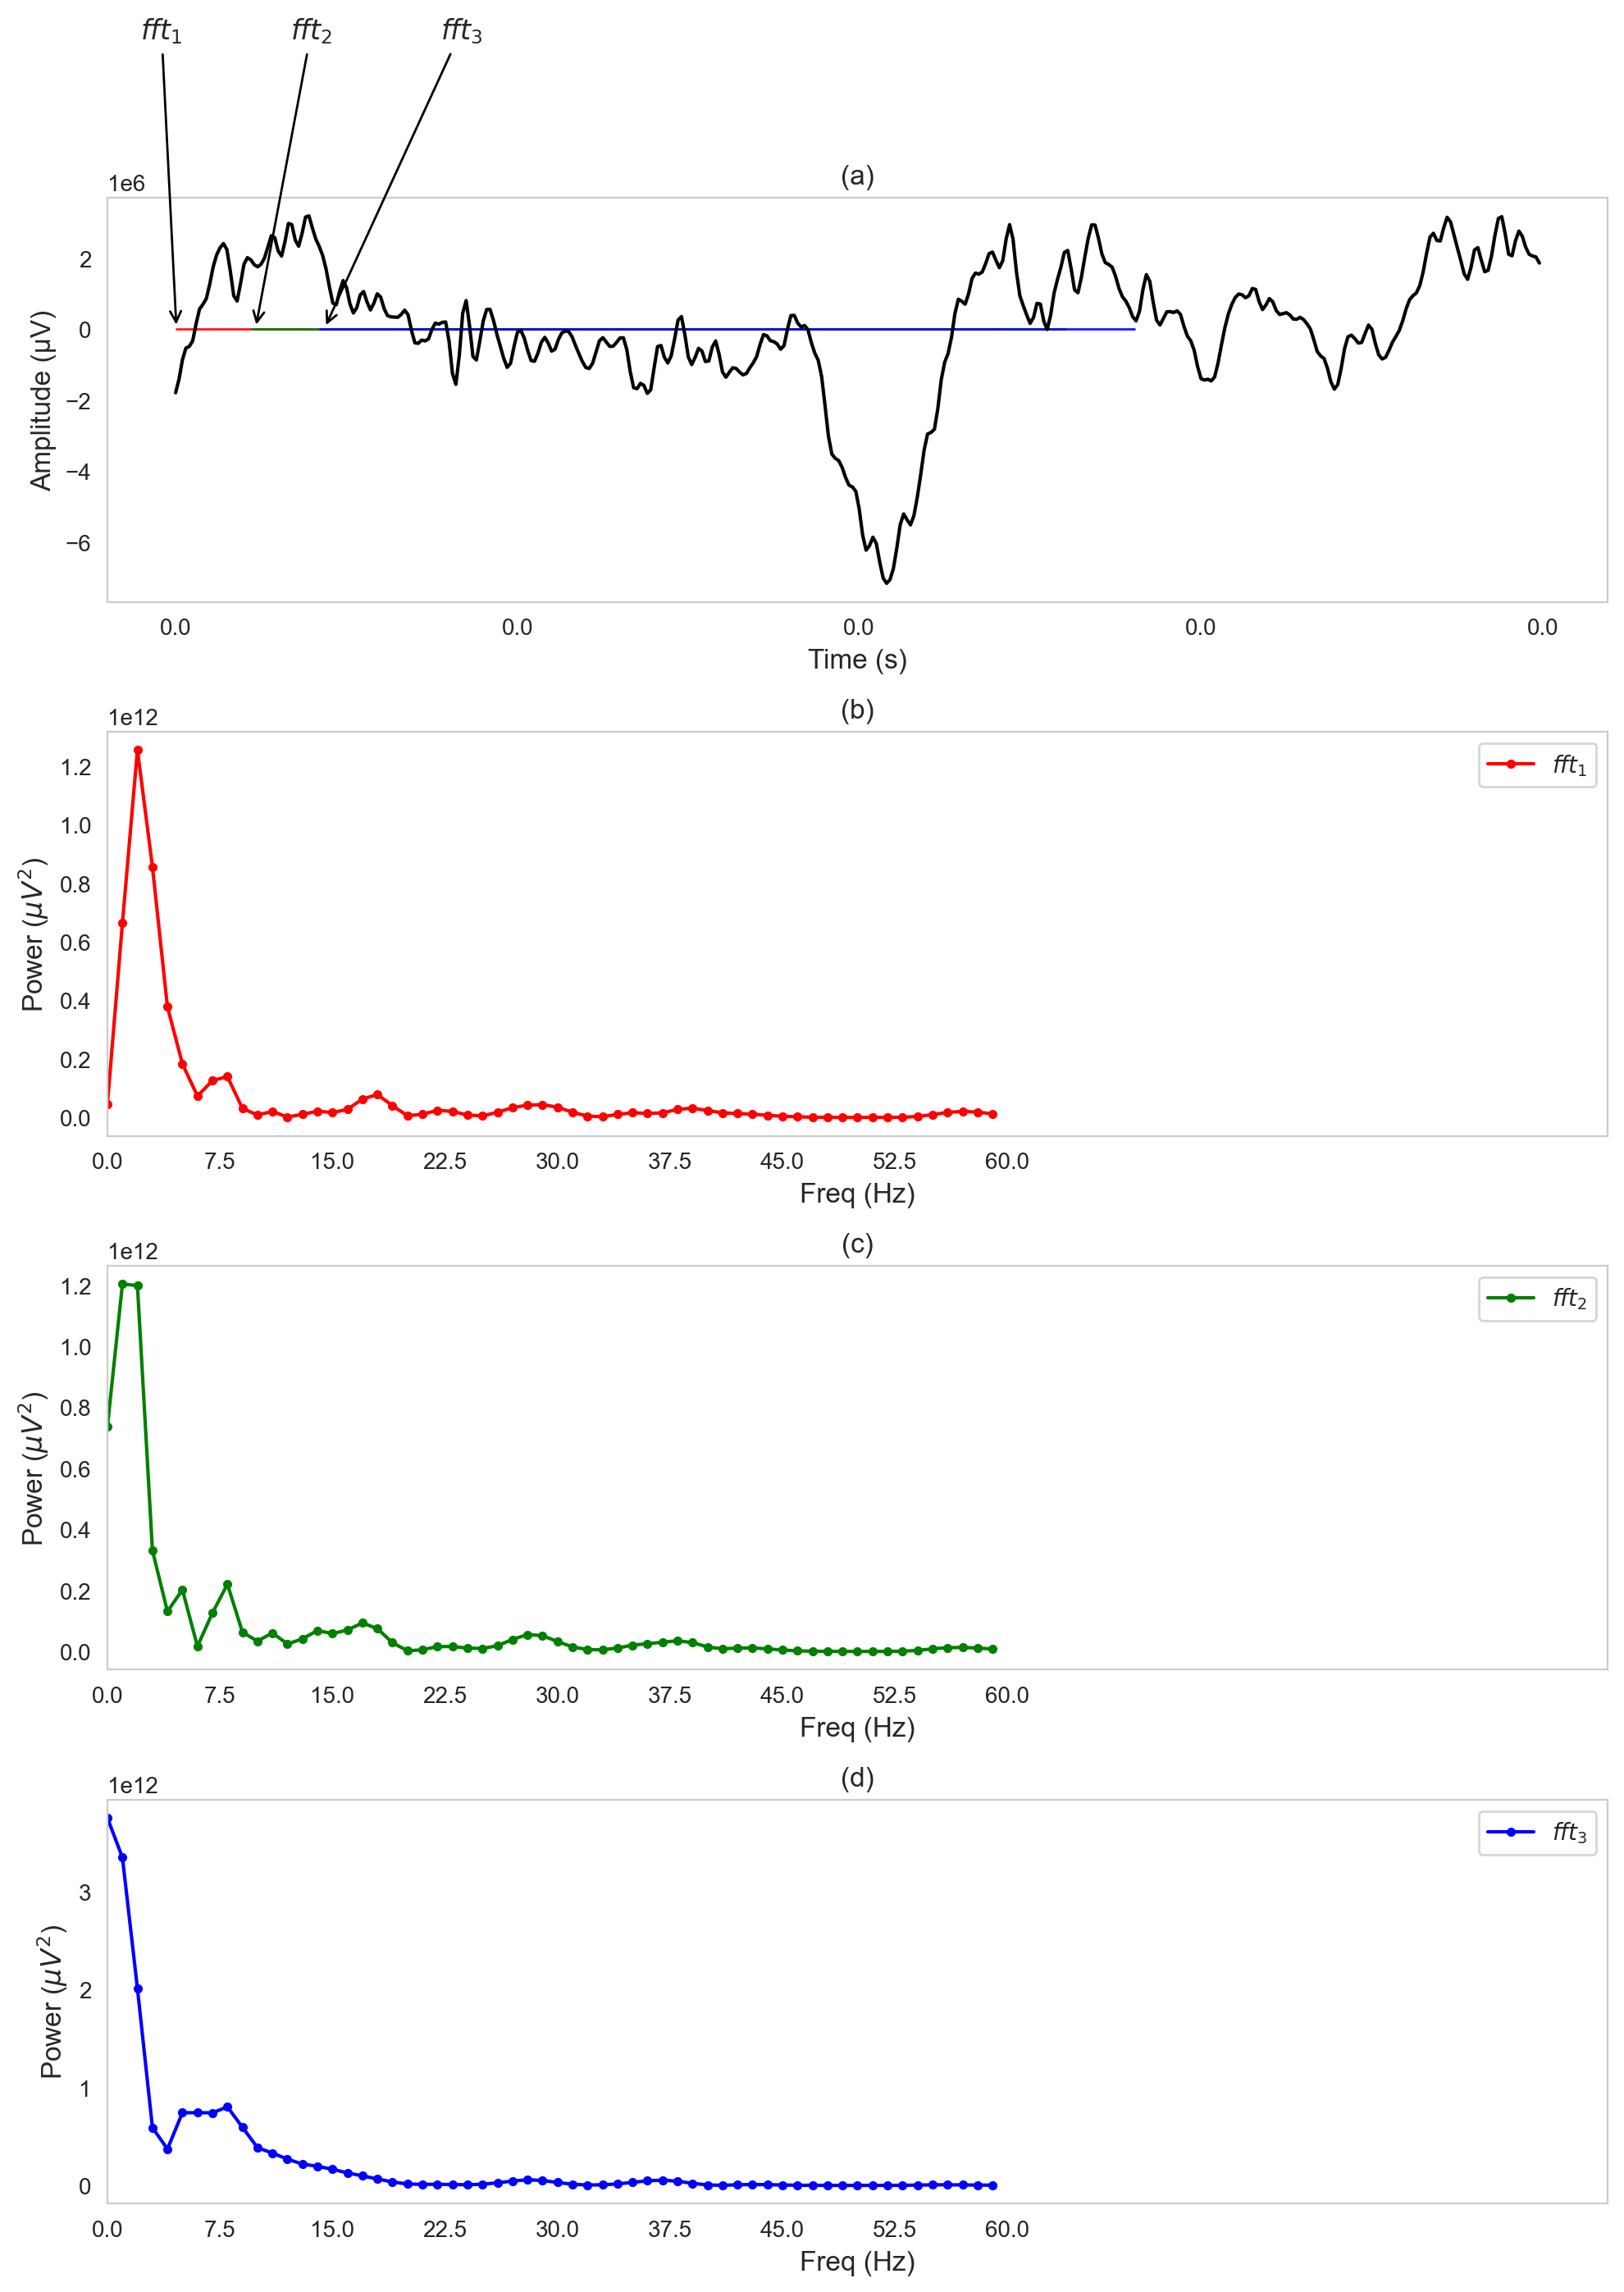

time: 952 ms (started: 2022-07-09 19:23:28 +02:00)


In [8]:
plot.explainer_(electrode_close,stft_close,cut_freq,s_rate)

In [9]:
def percentage(part, whole):
    percentage = 100 * float(part)/float(whole)
    return percentage

time: 245 µs (started: 2022-07-09 19:23:29 +02:00)


In [10]:
matrix_open = distance_matrix.EuclideanPyRQA_RP_stft(stft_open)
matrix_close = distance_matrix.EuclideanPyRQA_RP_stft(stft_close)

nbr_open=np.percentile(matrix_open, percentile)
nbr_close=np.percentile(matrix_close, percentile)

matrix_open_binary = distance_matrix.set_epsilon(matrix_open,nbr_open)
matrix_close_binary = distance_matrix.set_epsilon(matrix_close,nbr_close)

time: 64.1 ms (started: 2022-07-09 19:23:29 +02:00)


In [11]:
# plot.diagnostic(matrix_close, matrix_close_binary, s_rate, stft_close, cut_freq, 'closed_eyes', info_args)

time: 138 µs (started: 2022-07-09 19:23:29 +02:00)


/Users/luki/DataspellProjects/BrainPulse_Project/BrainPulse/plot.py:167: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


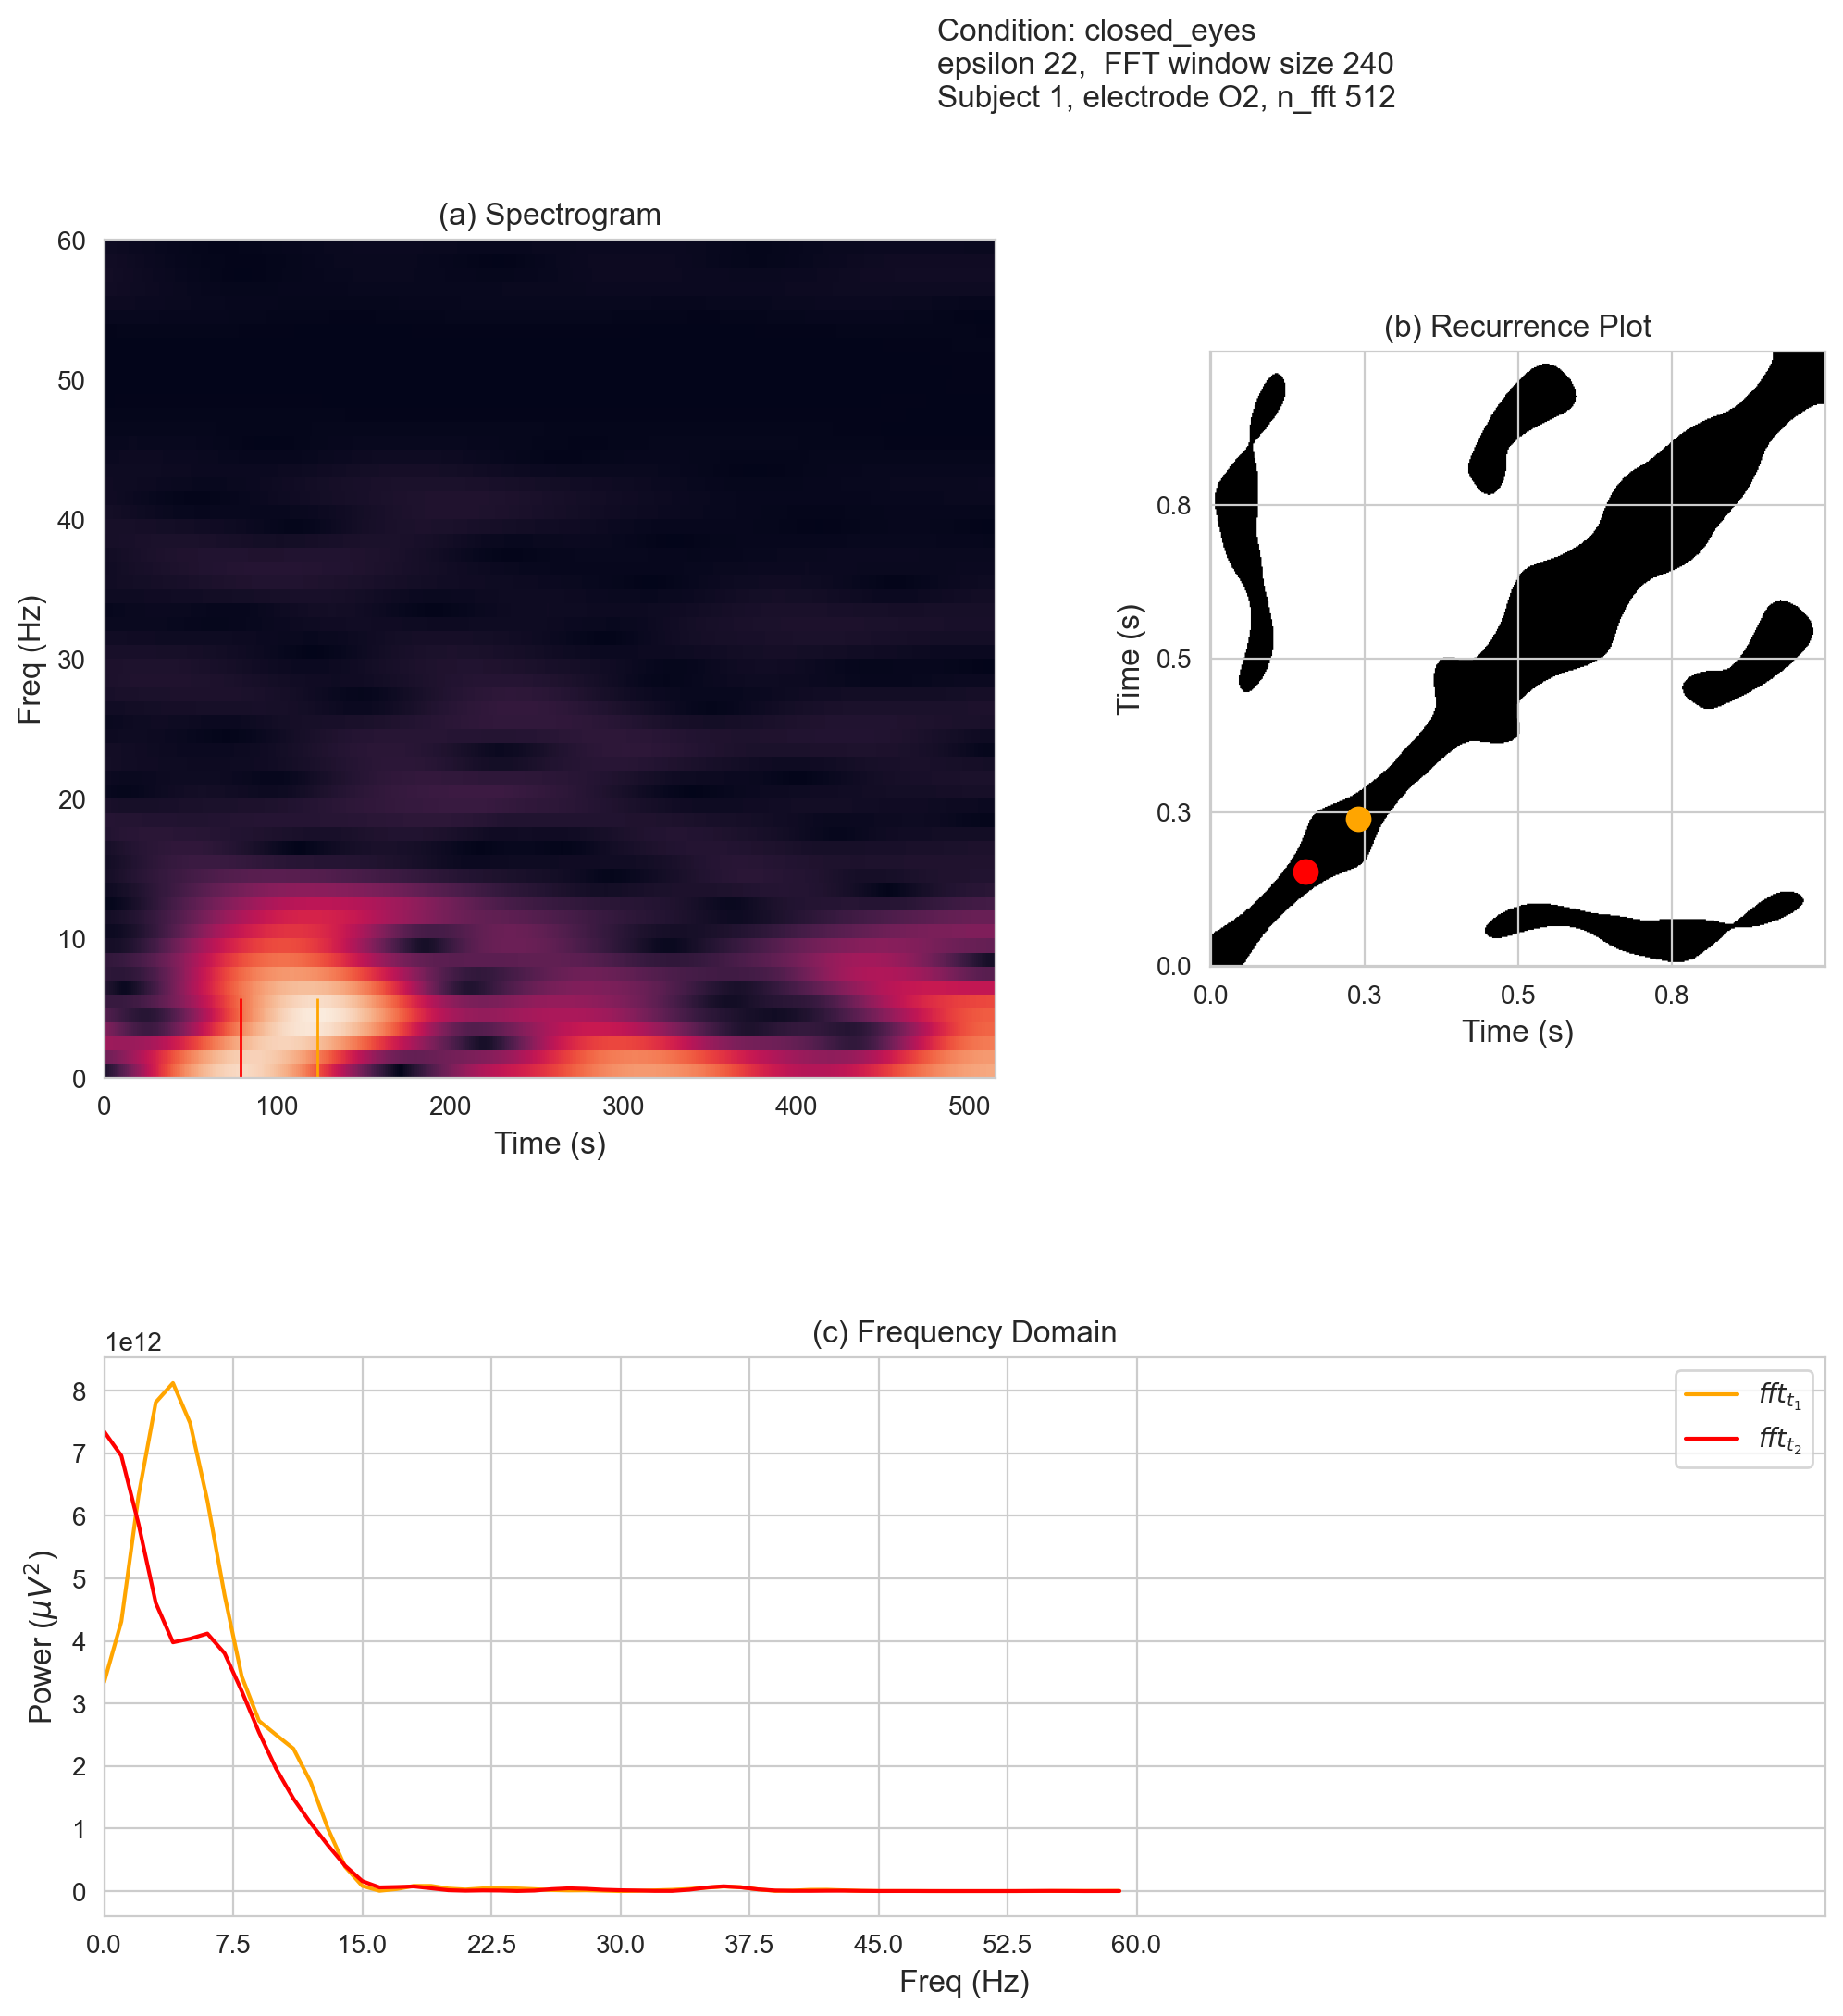

time: 685 ms (started: 2022-07-09 19:23:29 +02:00)


In [12]:
plot.stft_collections(matrix_close[100:700,100:700], matrix_close_binary[100:700,100:700], s_rate, stft_close[100:700], cut_freq, 'closed_eyes', info_args)


In [13]:
result_rqa_stft_open = recurrence_quantification_analysis.get_results(matrix_open_binary,2,2,2)
result_rqa_stft_closed = recurrence_quantification_analysis.get_results(matrix_close_binary,2,2,2)
print(result_rqa_stft_open)
print(result_rqa_stft_closed)

[0.21999867803556084, 0.9999515703319853, 73.74107142857143, 614, 0.0016286644951140066, 4.687546185012231, 4.545261722756134, 1.0, 86.1376811594203, 196, 4.7190700836808075, 1.000048432013561, 197.5994641661085, 584, 5.765724504037418, 87.13768005371094]
[0.21999867803556084, 0.9999031406639708, 47.6824480369515, 614, 0.0016286644951140066, 4.198605950587108, 4.54504158657874, 0.9999879820692473, 53.372674791533036, 232, 4.602760276913391, 1.0000848496237547, 142.65715667311412, 571, 5.635186885228203, 54.33910369873047]
time: 677 ms (started: 2022-07-09 19:23:29 +02:00)


In [14]:
# plot.features_per_subjects_violin()

time: 171 µs (started: 2022-07-09 19:23:30 +02:00)


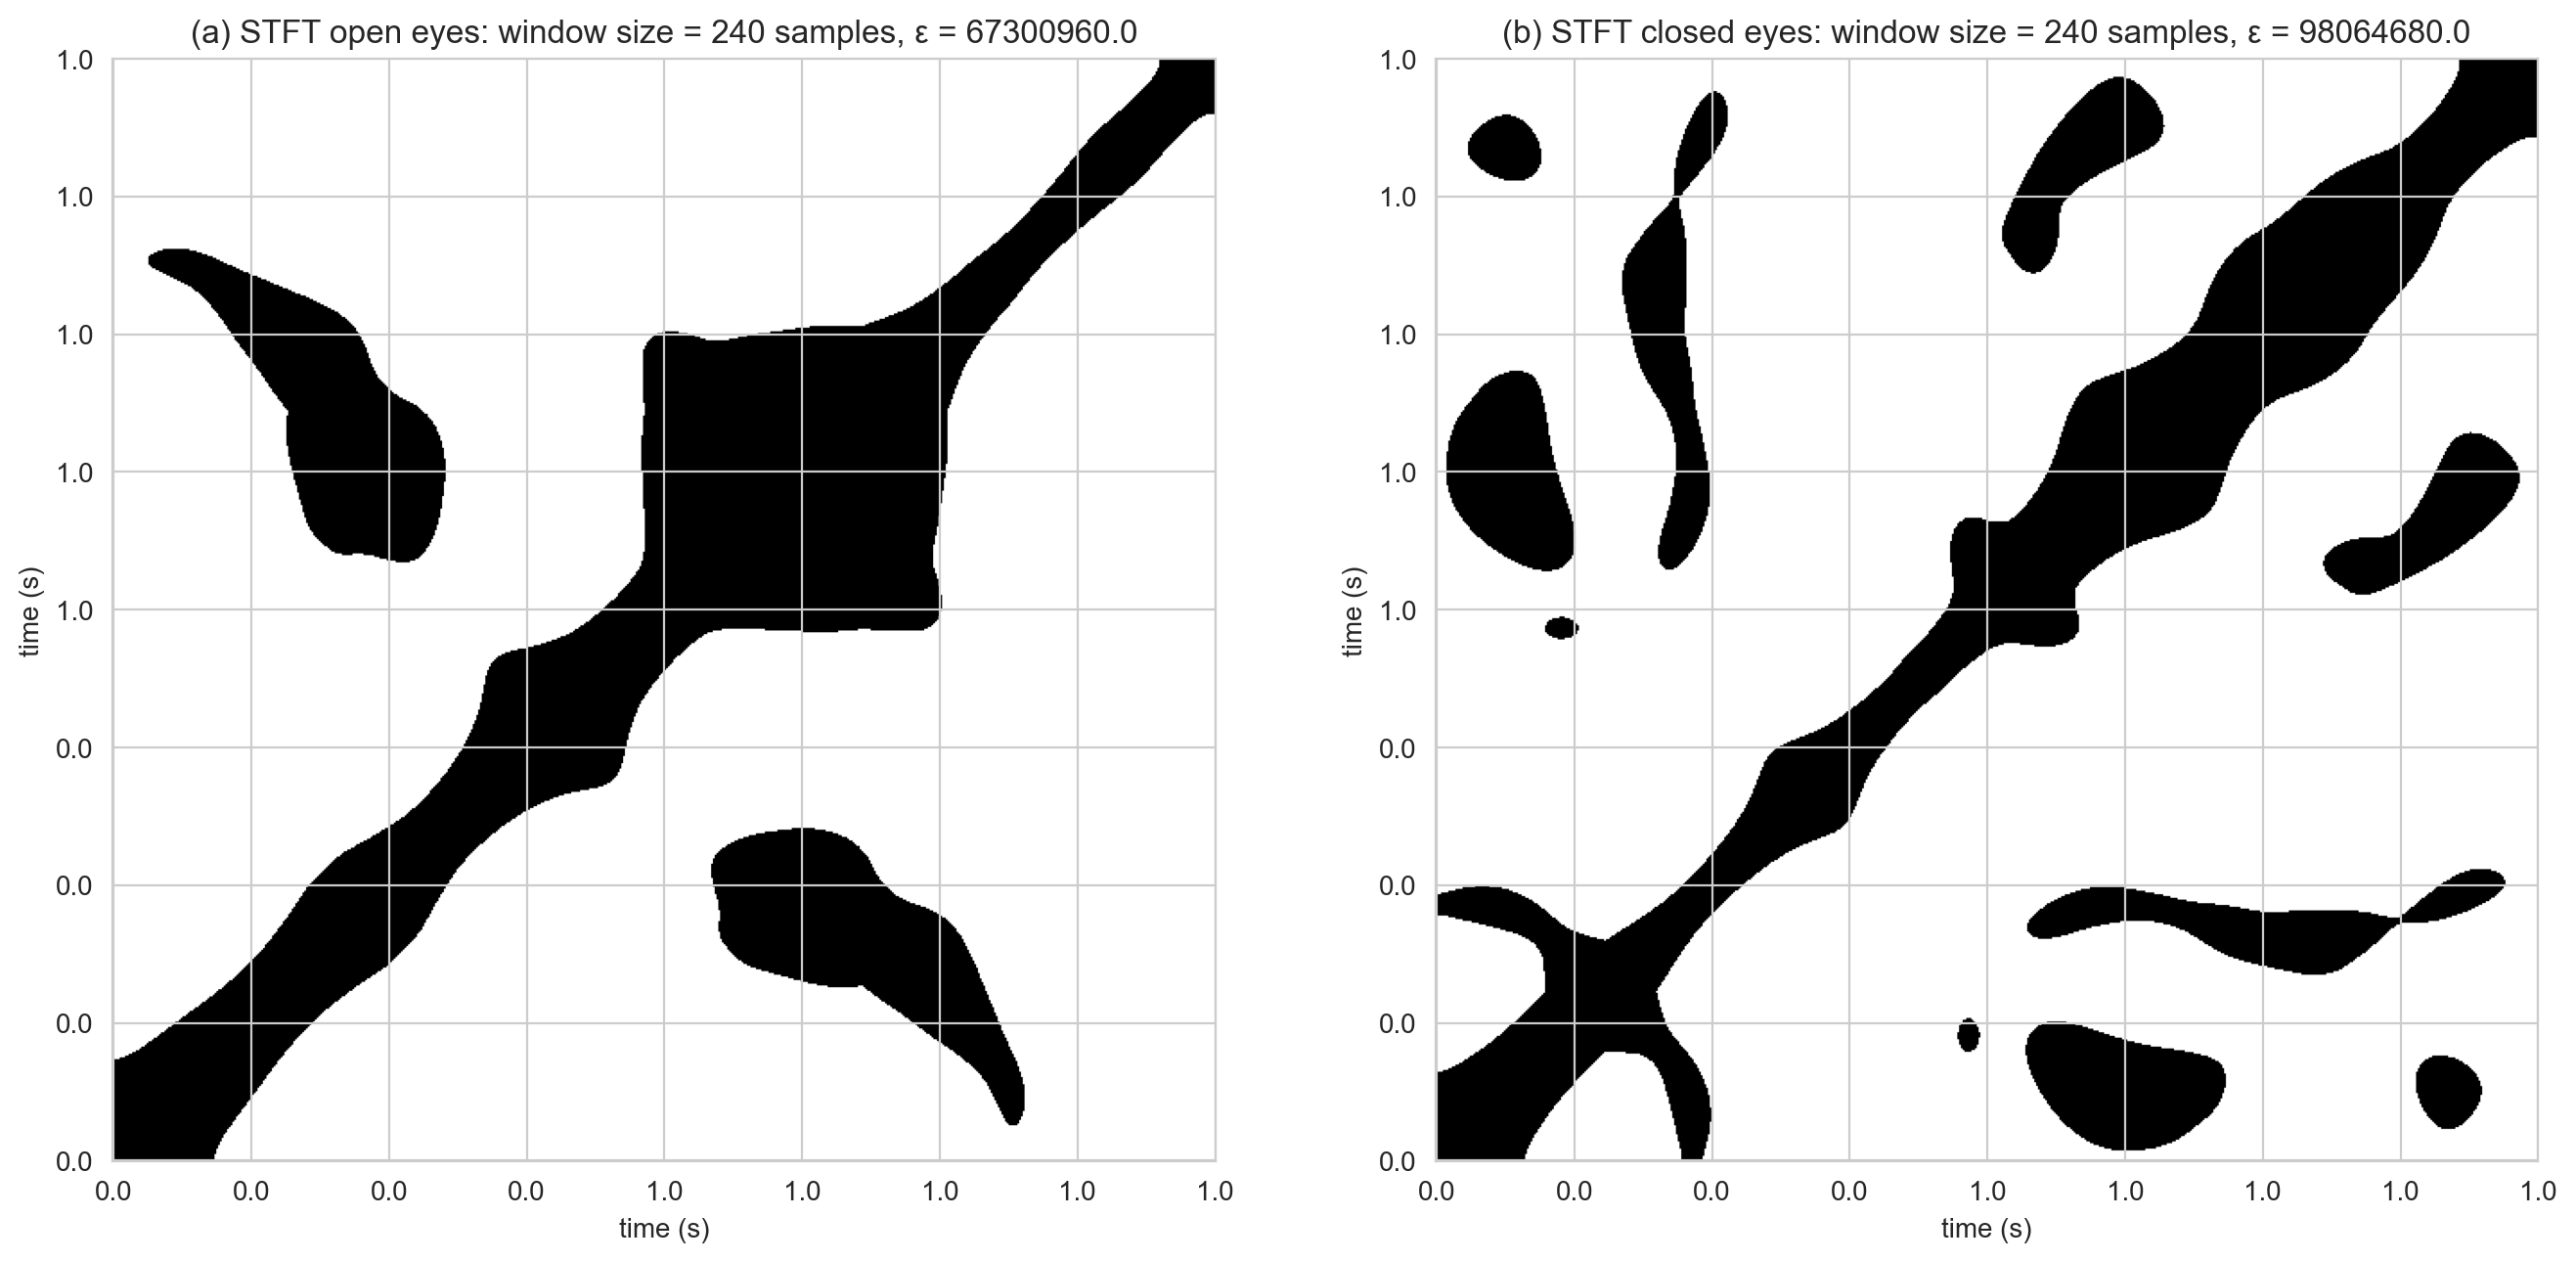

time: 677 ms (started: 2022-07-09 19:23:30 +02:00)


In [15]:
matrix_open_to_plot = matrix_open_binary
matrix_closed_to_plot = matrix_close_binary

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8),dpi=200)
ax1.imshow(matrix_open_to_plot, cmap='Greys', origin='lower') #cividis
ax1.set_xticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_yticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax1.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_yticks().shape[0])])
ax1.set_title('(a) STFT open eyes: window size = 240 samples, ε = '+str(np.round(nbr_open,2)))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('time (s)')

ax2.imshow(matrix_closed_to_plot, cmap='Greys', origin='lower')
ax2.set_xticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_yticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax2.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax2.get_yticks().shape[0])])
ax2.set_title('(b) STFT closed eyes: window size = 240 samples, ε = '+str(np.round(nbr_close,2)))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('time (s)')

plt.savefig('subplot_stft_open_close.jpg')

time: 679 ms (started: 2022-07-09 19:23:30 +02:00)


In [18]:
matrix_open_tdemb = distance_matrix.EuclideanPyRQA_RP(normalize(electrode_open),embedding = 5,timedelay = 9)
# matrix_close = distance_matrix.spearmanr_squereform(stft_close)
matrix_close_tdemb = distance_matrix.EuclideanPyRQA_RP(normalize(electrode_close),embedding = 5,timedelay = 9)
#
# nbr_open=np.median(matrix_open_tdemb)*0.24
# nbr_close=np.median(matrix_close_tdemb)*0.24

nbr_open=np.percentile(matrix_open_tdemb, percentile)
nbr_close=np.percentile(matrix_close_tdemb, percentile)

matrix_open_binary_tdemb = distance_matrix.set_epsilon(matrix_open_tdemb,nbr_open)
matrix_close_binary_tdemb = distance_matrix.set_epsilon(matrix_close_tdemb,nbr_close)

time: 26.2 ms (started: 2022-07-09 19:23:47 +02:00)


time: 29.2 ms (started: 2022-07-09 19:23:47 +02:00)


In [19]:
result_rqa_tdemb_open = recurrence_quantification_analysis.get_results(matrix_open_binary_tdemb,2,2,2)
result_rqa_tdemb_closed = recurrence_quantification_analysis.get_results(matrix_close_binary_tdemb,2,2,2)
print(result_rqa_tdemb_open)
print(result_rqa_tdemb_closed)

[0.21999856323559344, 0.9811574328030719, 8.290382387022015, 577, 0.0017331022530329288, 2.5296283745095787, 4.459835638800803, 0.9881629432093391, 11.10859590088712, 124, 3.0031987046062296, 1.0071400472259107, 36.37015259694806, 563, 3.761020088900009, 10.921436309814453]
[0.21999856323559344, 0.9748217224355458, 7.50147741663149, 577, 0.0017331022530329288, 2.4255197245229536, 4.431036767233896, 0.9857683202264007, 10.001656543346218, 127, 2.8823021819827184, 1.0112293330553872, 33.554234001292826, 424, 3.814478768632297, 9.865862846374512]
time: 6.56 ms (started: 2022-07-09 19:23:47 +02:00)


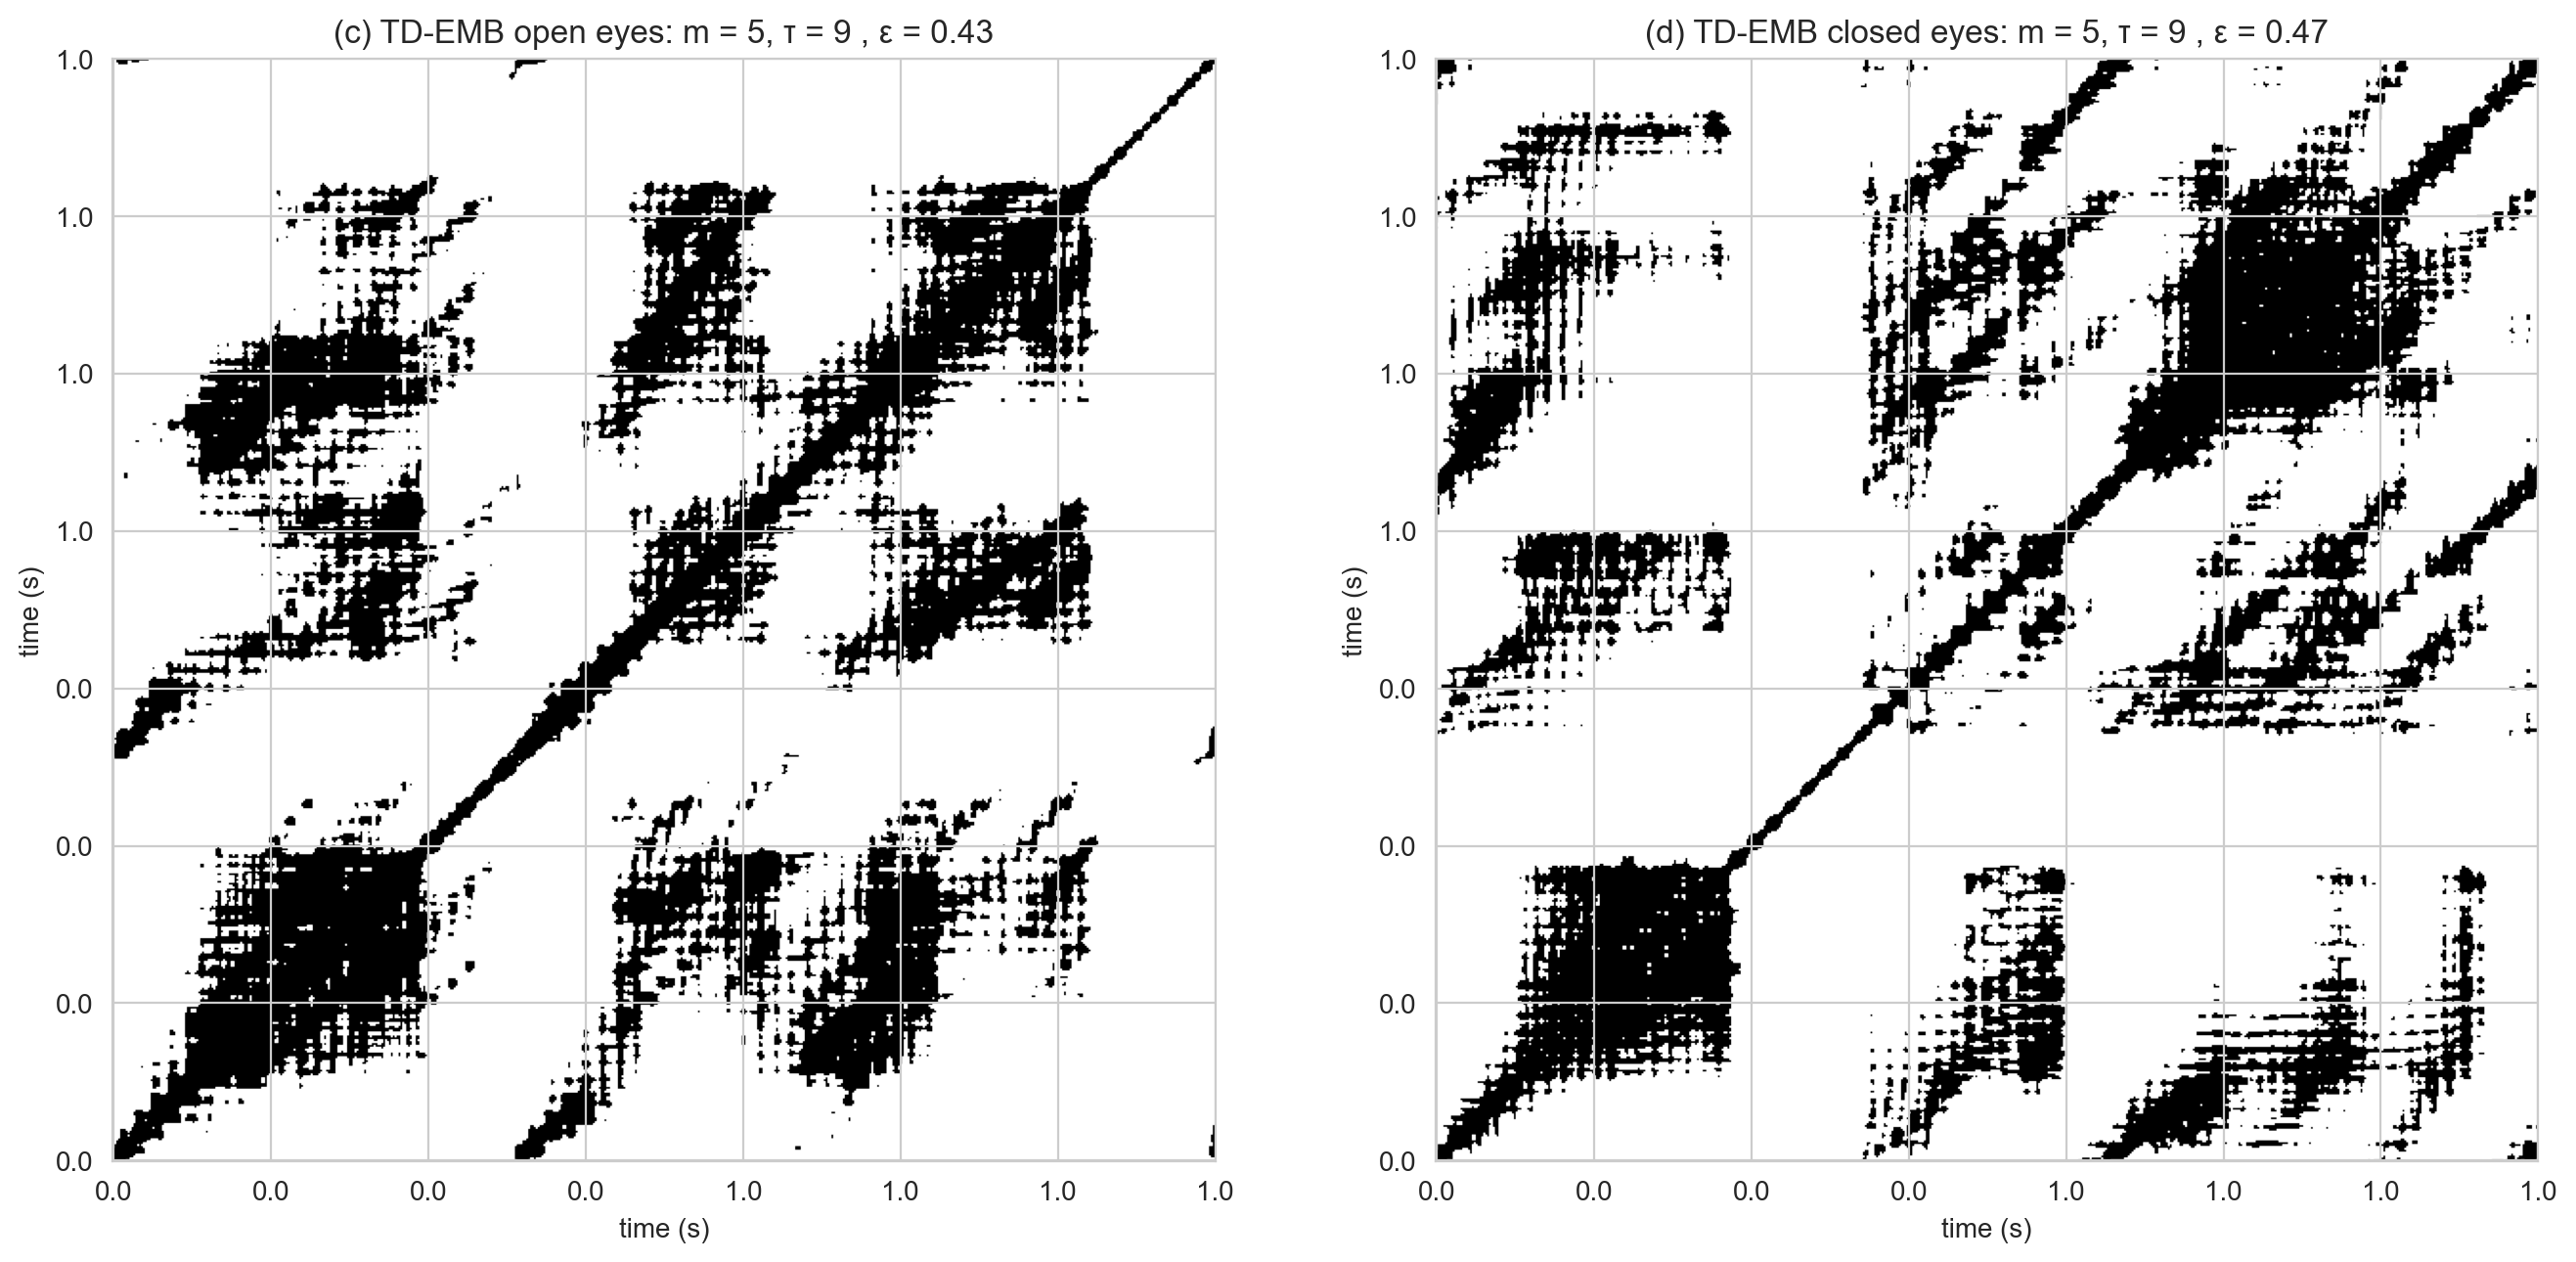

time: 711 ms (started: 2022-07-09 19:23:47 +02:00)


In [20]:

matrix_open_to_plot = matrix_open_binary_tdemb
matrix_closed_to_plot = matrix_close_binary_tdemb


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16,8),dpi=200)
ax1.imshow(matrix_open_to_plot, cmap='Greys', origin='lower')
ax1.set_xticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_yticks(np.linspace(0, matrix_open_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax1.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax1.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_open_to_plot.shape[0] / s_rate, ax1.get_yticks().shape[0])])
ax1.set_title('(c) TD-EMB open eyes: m = 5, τ = 9 , ε = '+str(np.round(nbr_open,2)))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('time (s)')

ax2.imshow(matrix_closed_to_plot, cmap='Greys', origin='lower')
ax2.set_xticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_yticks(np.linspace(0, matrix_closed_to_plot.shape[0] , ax1.get_xticks().shape[0]))
ax2.set_xticklabels([str(np.around(x,decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax1.get_xticks().shape[0])])
ax2.set_yticklabels([str(np.around(x, decimals=0)) for x in np.linspace(0, matrix_closed_to_plot.shape[0] / s_rate, ax2.get_yticks().shape[0])])
ax2.set_title('(d) TD-EMB closed eyes: m = 5, τ = 9 , ε = '+str(np.round(nbr_close,2)))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('time (s)')

plt.savefig('subplot_td-emb_open_close.jpg')